# Regression and Other Stories: Introclass

Plot residuals vs. predicted values, or residuals vs. observed values? See Chapter 11 in Regression and Other Stories.

In [67]:
import arviz as az
from bambi import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
from scipy import stats
import statsmodels.formula.api as sm

In [12]:
introclass = pd.read_fwf("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Introclass/data/gradesW4315.dat")

# Raw file contains some blank lines. Dropping them here
introclass = introclass.dropna(axis=0)
introclass.head()

,hw1,hw2,hw3,hw4,midterm,hw5,hw6,hw7,final
0,95.0,88.0,100.0,95.0,80.0,96.0,99.0,0.0,103.0
1,0.0,74.0,74.0,0.0,53.0,83.0,97.0,0.0,79.0
2,100.0,0.0,105.0,100.0,91.0,96.0,100.0,96.0,122.0
3,0.0,90.0,76.0,100.0,63.0,91.0,95.0,0.0,78.0
4,100.0,96.0,99.0,100.0,91.0,93.0,100.0,92.0,135.0


In [15]:
model = Model(introclass)
fit_1 = model.fit('final ~ midterm', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [final_sd, midterm, Intercept]
INFO:pymc3:NUTS: [final_sd, midterm, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [17]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(fit_1, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],67.54,11.13
midterm[0],0.66,0.14
final_sd,14.54,0.77


### Compute residuals
compute predictions from simulations

In [88]:
predicted = fit_1.posterior["Intercept"].values.ravel() + np.outer(fit_1.posterior["midterm"].values.ravel(), introclass[["midterm"]].values).T
predicted_means = predicted.mean(axis=1)

#### We can also use posterior predictive

In [92]:
with model.backend.model:
    posterior_predictive = pm.sample_posterior_predictive(model.backend.trace)
predicted_means = posterior_predictive["final"].mean(axis=0).squeeze()

In [93]:
resid = introclass["final"] - predicted_means

### Plot residuals vs predicted

Text(0.5, 0, 'predicted value')

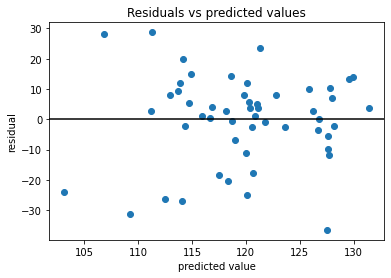

In [94]:
fig, ax = plt.subplots()
ax.scatter(predicted_means,resid )
ax.axhline(0, c="black")
ax.set_title("Residuals vs predicted values")
ax.set_ylabel("residual")
ax.set_xlabel("predicted value")

### Plot residuals vs predicted

Text(0.5, 0, 'predicted value')

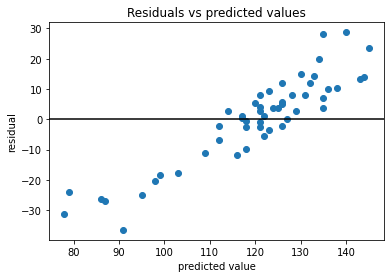

In [95]:
fig, ax = plt.subplots()
ax.scatter(introclass["final"], resid )
ax.axhline(0, c="black")
ax.set_title("Residuals vs predicted values")
ax.set_ylabel("residual")
ax.set_xlabel("predicted value")

In [33]:
a = np.array([1, 2, 4])
b = np.array([1, 2, 7])
x = np.array([1, 2])
a + np.outer(x, b)

array([[ 2,  4, 11],
       [ 3,  6, 18]])

In [45]:
np.outer(fit_1.posterior["midterm"].values, introclass[["midterm"]])

(4000, 52)

In [49]:
np.outer(fit_1.posterior["midterm"].values, introclass[["midterm"]].values).shape

(4000, 52)

In [62]:
x.shape

(52, 4000)